# Unit 5 - Financial Planning

In [55]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools1 import MCSimulation

%matplotlib inline

In [56]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [57]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [58]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [59]:
# Fetch current BTC price
btc_response = requests.get(btc_url).json()
btc_price = btc_response['data']['1']['quotes']['CAD']['price']

# Fetch current ETH price
eth_response = requests.get(eth_url).json()
eth_price = eth_response['data']['1027']['quotes']['CAD']['price']

# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $42355.86
The current value of your 5.3 ETH is $12535.36


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [60]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [61]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version='v2')

In [62]:
# Format current date as ISO format
today = pd.Timestamp('2023-06-14', tz='America/New_York').isoformat()


# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_investments = alpaca.get_bars(
    tickers,
    timeframe,
    start = today
).df

# Reorganize the DataFrame
# Separate ticker data
AGG = df_investments[df_investments['symbol']=='AGG'].drop('symbol', axis = 1)
SPY = df_investments[df_investments['symbol']=='SPY'].drop('symbol', axis = 1)

# Concatenate the ticker DataFrames
df_investments = pd.concat([AGG,SPY], axis=1, keys=['AGG','SPY'])
# Preview DataFrame
df_investments

AGG                                             \
                            open   high    low   close   volume trade_count   
timestamp                                                                     
2023-06-14 04:00:00+00:00  97.88  97.99  97.79  97.965  2329162        8769   

                                         SPY                            \
                                vwap    open      high     low   close   
timestamp                                                                
2023-06-14 04:00:00+00:00  97.874612  437.01  439.0612  436.51  438.57   

                                                           
                             volume trade_count      vwap  
timestamp                                                  
2023-06-14 04:00:00+00:00  22525303      185278  437.7647

In [63]:
# Pick AGG and SPY close prices
agg_close = pd.DataFrame()
spy_close = pd.DataFrame()

agg_close["AGG"] = df_investments['AGG']['close']
spy_close['SPY'] = df_investments['SPY']['close']

agg_close_price = agg_close['AGG'].iloc[-1]
spy_close_price = spy_close['SPY'].iloc[-1]
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $97.965
Current SPY closing price: $438.57


In [64]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $21928.50
The current value of your 200 AGG shares is $19593.00


### Savings Health Analysis

In [65]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
shares = my_spy_value + my_agg_value
crypto = my_eth_value + my_btc_value

# Create savings DataFrame
data = {'amount' :[crypto, shares]}
index = ['crypto', 'shares']
df_savings = pd.DataFrame(data, index=index)
# Display savings DataFrame
display(df_savings.sum)

<bound method NDFrame._add_numeric_operations.<locals>.sum of              amount
crypto  54891.21545
shares  41521.50000>

<Axes: ylabel='amount'>

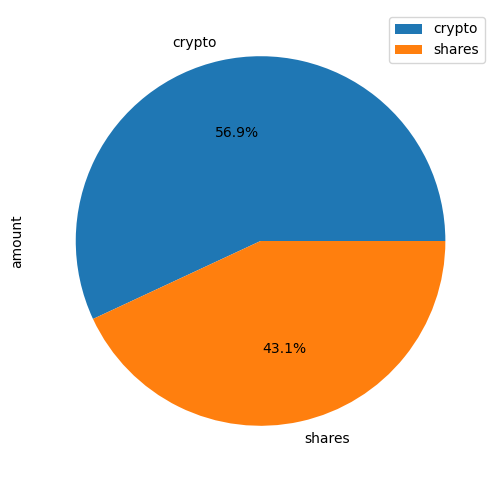

In [66]:
# Plot savings pie chart
df_savings.plot.pie(y='amount', autopct='%.1f%%', figsize=(6, 6))


In [67]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = df_savings.sum()
# Validate saving health
if (total_savings > emergency_fund).any():
    print("Congratulations! You have enough money in your emergency fund")
elif (total_savings < emergency_fund).any():
    difference = emergency_fund - total_savings
    print(f"You are ${difference} dollars away from meeting your financial goal")
else:
    print("Congratulations! You met your financial goal")


Congratulations! You have enough money in your emergency fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [68]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2018-06-14', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-06-14', tz='America/New_York').isoformat()

In [69]:
# Get 5 years' worth of historical data for SPY and AGG

df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df
# Reorganize the DataFrame
# Separate ticker data
AGG = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis = 1)
SPY = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis = 1)



# Concatenate the ticker DataFrames
df_portfolio = pd.concat([AGG,SPY], axis=1, keys=['AGG','SPY'])
# Display sample data
df_portfolio.head()

AGG                                      \
                             open     high      low    close   volume   
timestamp                                                               
2018-06-14 04:00:00+00:00  105.75  105.860  105.691  105.840  4689627   
2018-06-15 04:00:00+00:00  106.01  106.089  105.860  105.880  2361854   
2018-06-18 04:00:00+00:00  105.93  105.930  105.800  105.900  2359452   
2018-06-19 04:00:00+00:00  106.05  106.110  105.980  106.010  2184239   
2018-06-20 04:00:00+00:00  106.06  106.060  105.790  105.805  2403650   

                                                      SPY                    \
                          trade_count        vwap    open    high       low   
timestamp                                                                     
2018-06-14 04:00:00+00:00       16198  105.765441  279.01  279.33  278.0599   
2018-06-15 04:00:00+00:00       12759  105.936682  276.61  277.51  275.3500   
2018-06-18 04:00:00+00:00       10590  105.864382  275.49  276.70  274.9500   
2018-06-19 04:00:00+00:00       10342  106.041881  274.00  275.75  273.5300   
2018-06-20 04:00:00+00:00        9220  105.886127  276.26  276.72  275.5900   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2018-06-14 04:00:00+00:00  278.68   77667620      233427  278.670576  
2018-06-15 04:00:00+00:00  277.03  120673012      305807  276.757012  
2018-06-18 04:00:00+00:00  276.59   53163695      221103  276.151288  
2018-06-19 04:00:00+00:00  275.48   97669710      337433  274.931757  
2018-06-20 04:00:00+00:00  276.01   54051558      212283  276.065730

In [76]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_dist = MCSimulation(
    portfolio_data = df_portfolio,
    weights = [.4,.6],
    num_simulation = 500,
    num_trading_days = 252*30
)


In [77]:
# Printing the simulation input data
MC_dist.portfolio_data.head()

AGG                                      \
                             open     high      low    close   volume   
timestamp                                                               
2018-06-14 04:00:00+00:00  105.75  105.860  105.691  105.840  4689627   
2018-06-15 04:00:00+00:00  106.01  106.089  105.860  105.880  2361854   
2018-06-18 04:00:00+00:00  105.93  105.930  105.800  105.900  2359452   
2018-06-19 04:00:00+00:00  106.05  106.110  105.980  106.010  2184239   
2018-06-20 04:00:00+00:00  106.06  106.060  105.790  105.805  2403650   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2018-06-14 04:00:00+00:00       16198  105.765441          NaN  279.01   
2018-06-15 04:00:00+00:00       12759  105.936682     0.000378  276.61   
2018-06-18 04:00:00+00:00       10590  105.864382     0.000189  275.49   
2018-06-19 04:00:00+00:00       10342  106.041881     0.001039  274.00   
2018-06-20 04:00:00+00:00        9220  105.886127    -0.001934  276.26   

                                                                            \
                             high       low   close     volume trade_count   
timestamp                                                                    
2018-06-14 04:00:00+00:00  279.33  278.0599  278.68   77667620      233427   
2018-06-15 04:00:00+00:00  277.51  275.3500  277.03  120673012      305807   
2018-06-18 04:00:00+00:00  276.70  274.9500  276.59   53163695      221103   
2018-06-19 04:00:00+00:00  275.75  273.5300  275.48   97669710      337433   
2018-06-20 04:00:00+00:00  276.72  275.5900  276.01   54051558      212283   

                                                    
                                 vwap daily_return  
timestamp                                           
2018-06-14 04:00:00+00:00  278.670576          NaN  
2018-06-15 04:00:00+00:00  276.757012    -0.005921  
2018-06-18 04:00:00+00:00  276.151288    -0.001588  
2018-06-19 04:00:00+00:00  274.931757    -0.004013  
2018-06-20 04:00:00+00:00  276.065730     0.001924

In [78]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.989437,1.008942,0.994733,1.000326,1.000049,1.008585,1.022351,1.000231,0.993487,1.007666,...,1.015505,1.007171,1.007235,1.003253,0.991079,0.996749,0.990814,0.986426,1.003638,0.999965
2,0.996118,1.001408,0.999975,0.991597,1.012349,1.001138,1.046756,1.013060,0.976436,0.994896,...,1.014016,1.007403,1.000855,1.007728,0.993655,0.978115,1.001781,0.987325,1.004218,0.990538
3,0.996618,1.004998,0.999946,1.009421,1.015563,0.988261,1.048015,1.006925,0.976572,0.996647,...,1.021351,1.023157,0.987572,1.001439,1.005831,0.979042,0.992468,0.993557,1.006120,0.993164
4,0.998050,0.992632,0.989029,1.014038,1.002269,0.978451,1.054373,0.997858,0.979336,0.995845,...,1.024331,1.018036,0.985298,0.997362,1.007908,0.980683,0.988228,0.991862,0.993943,0.981286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,4.435516,12.655031,1.047169,2.770439,4.822419,12.197440,7.592554,6.484908,1.927808,8.070617,...,3.695025,3.208857,3.549765,4.088735,3.396444,9.304362,2.667810,6.125908,3.700400,2.717328
7557,4.453733,12.658619,1.044015,2.793795,4.838801,12.315941,7.536311,6.456199,1.939154,7.967066,...,3.726139,3.192760,3.595703,3.979749,3.413706,9.300775,2.657539,6.188928,3.751513,2.710792
7558,4.440295,12.687135,1.032630,2.800050,4.889705,12.161097,7.573476,6.546790,1.949392,7.890265,...,3.697749,3.173215,3.594744,4.013099,3.434609,9.507558,2.671403,6.175405,3.770098,2.692801
7559,4.459351,12.811479,1.034613,2.820271,4.881332,12.212506,7.526941,6.484147,1.973201,7.931770,...,3.682711,3.170539,3.615051,4.014664,3.442465,9.506536,2.685019,6.187459,3.766270,2.689718


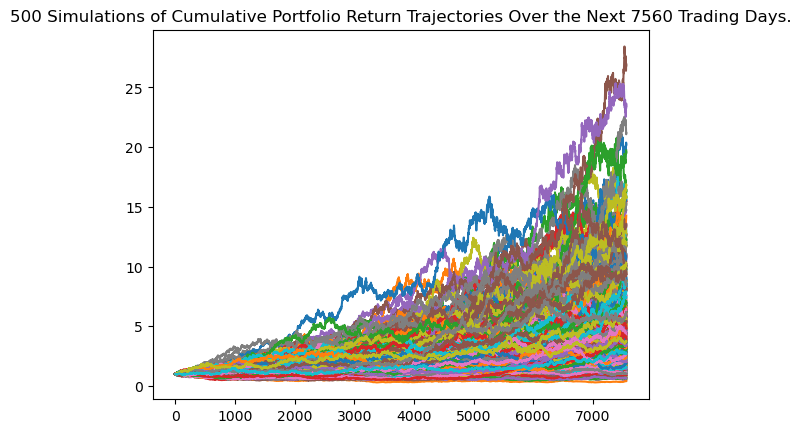

In [84]:
# Plot simulation outcomes
line_plot = MC_dist.plot_simulation()

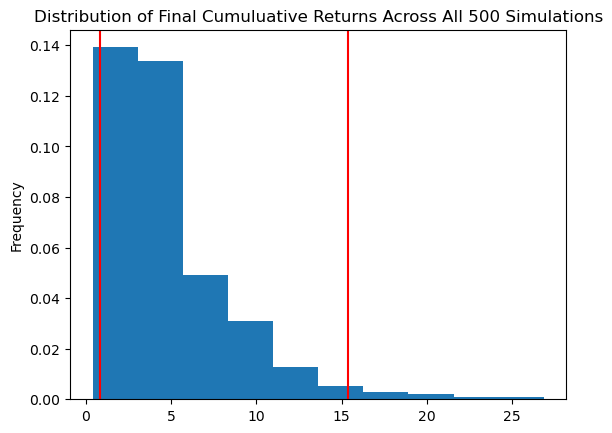

In [85]:
# Plot probability distribution and confidence intervals
dist_plot = MC_dist.plot_distribution()

### Retirement Analysis

In [86]:
# Fetch summary statistics from the Monte Carlo simulation results
dist_tbl = MC_even_dist.summarize_cumulative_return()
# Print summary statistics
print(dist_tbl)

count           500.000000
mean              4.918913
std               3.625263
min               0.539683
25%               2.485629
50%               3.721584
75%               6.355532
max              25.087088
95% CI Lower      0.979430
95% CI Upper     13.617291
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [83]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(even_tbl[8]*initial_investment,2)
ci_upper = round(even_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $19588.61 and $272345.83


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [87]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(even_tbl[8]*initial_investment,2)
ci_upper = round(even_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $29382.91 and $408518.74
